In [2]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras
import wget
import zipfile
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
from keras.utils import to_categorical
from tqdm import tqdm
from tqdm import tqdm
from PIL import UnidentifiedImageError
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [4]:
# Download the data
if not os.path.exists('kagglecatsanddogs_5340.zip'):
    wget.download('https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip')

# Unzip the data
with zipfile.ZipFile('kagglecatsanddogs_5340.zip', 'r') as zip_ref:
    zip_ref.extractall(os.path.join('PetImages'))

In [79]:
# Define o nome do arquivo .zip e o nome da pasta que você deseja extrair
zip_file = 'kagglecatsanddogs_5340.zip'
folder = 'PetImages'

# Verifica se o arquivo .zip já existe antes de fazer o download
if not os.path.exists(zip_file_name):
    wget.download('https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/' + zip_file)

# Extrai apenas a pasta 'PetImages' do arquivo .zip
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    for file_info in tqdm(zip_ref.infolist()):
        if file_info.filename.startswith(folder):
            zip_ref.extract(file_info)

100%|██████████| 25006/25006 [00:19<00:00, 1256.77it/s]


In [80]:
root = 'PetImages'
train_split, val_split = 0.7, 0.15
categories = [c[0] for c in os.walk(root) if c[0]][1:]

print(categories)

['PetImages\\Cat', 'PetImages\\Dog']


In [6]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [7]:
data = []

for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    for img_path in tqdm(images):
        try:
            img, x = get_image(img_path)
            data.append({'x': np.array(x[0]), 'y': c})
        except Exception as e:
            # Trate a exceção aqui, por exemplo, ignorando a imagem problemática ou registrando o erro.
            print(f"Erro ao processar imagem: {img_path}, Error: {e}")

# count the number of classes
num_classes = len(categories)


 70%|███████   | 8807/12500 [01:30<00:26, 137.82it/s]

Erro ao processar imagem: PetImages\PetImages\Cat\666.jpg, Error: cannot identify image file <_io.BytesIO object at 0x000002097A7B0F40>


 15%|█▌        | 1914/12500 [00:18<01:44, 101.64it/s]

Erro ao processar imagem: PetImages\PetImages\Dog\11702.jpg, Error: cannot identify image file <_io.BytesIO object at 0x00000208BD98BD60>


 91%|█████████▏| 11430/12500 [01:47<00:09, 110.20it/s]c:\Users\felip\anaconda3\envs\inteligencia_artificial\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 12500/12500 [01:57<00:00, 106.25it/s]


In [8]:
random.shuffle(data)

In [9]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [10]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 

In [11]:
batch_size = 32  # Tamanho do lote

# Normalizar e converter etiquetas em lotes para os dados de treinamento
for i in tqdm(range(0, len(x_train), batch_size)):
    x_train[i:i + batch_size] = x_train[i:i + batch_size].astype('float32') / 255.
    # y_batch = to_categorical(y_train[i:i + batch_size], num_classes)
    # y_train[i:i + batch_size] = np.array(y_batch)

# Repita o processo para os dados de validação e teste
for i in tqdm(range(0, len(x_val), batch_size)):
    x_val[i:i + batch_size] = x_val[i:i + batch_size].astype('float32') / 255.
    # y_batch = to_categorical(y_val[i:i + batch_size], num_classes)
    # y_val[i:i + batch_size] = np.array(y_batch)

for i in tqdm(range(0, len(x_test), batch_size)):
    x_test[i:i + batch_size] = x_test[i:i + batch_size].astype('float32') / 255.
    # y_batch = to_categorical(y_test[i:i + batch_size], num_classes)
    # y_test[i:i + batch_size] = np.array(y_batch)

# convert labels to one-hot vectors
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_test.shape)

100%|██████████| 118/118 [00:18<00:00,  6.44it/s]


(3750, 2)


In [12]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 24998 images from 2 categories
train / validation / test split: 17498, 3750, 3750
training data shape:  (17498, 224, 224, 3)
training labels shape:  (17498, 2)


In [13]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout (Dropout)      

In [14]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
137/137 [==============================] - 50s 363ms/step - loss: 0.6414 - accuracy: 0.6103 - val_loss: 0.5895 - val_accuracy: 0.6701
Epoch 2/10
137/137 [==============================] - 24s 172ms/step - loss: 0.5593 - accuracy: 0.7089 - val_loss: 0.4998 - val_accuracy: 0.7533
Epoch 3/10
137/137 [==============================] - 26s 189ms/step - loss: 0.4920 - accuracy: 0.7602 - val_loss: 0.4524 - val_accuracy: 0.7816
Epoch 4/10
137/137 [==============================] - 30s 220ms/step - loss: 0.4434 - accuracy: 0.7936 - val_loss: 0.4437 - val_accuracy: 0.7920
Epoch 5/10
137/137 [==============================] - 24s 176ms/step - loss: 0.3914 - accuracy: 0.8234 - val_loss: 0.3933 - val_accuracy: 0.8243
Epoch 6/10
137/137 [==============================] - 27s 197ms/step - loss: 0.3521 - accuracy: 0.8468 - val_loss: 0.3442 - val_accuracy: 0.8405
Epoch 7/10
137/137 [==============================] - 34s 247ms/step - loss: 0.3167 - accuracy: 0.8610 - val_loss: 0.3315 - val_ac

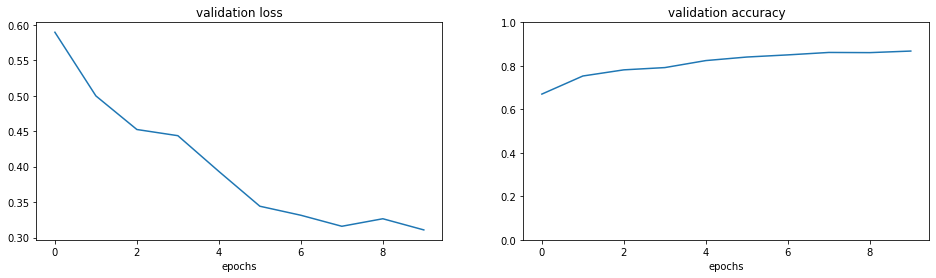

In [15]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3057509958744049
Test accuracy: 0.865066647529602


In [17]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [19]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [20]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))

Epoch 1/10
137/137 [==============================] - 91s 664ms/step - loss: 0.3910 - accuracy: 0.8216 - val_loss: 0.2686 - val_accuracy: 0.8909
Epoch 2/10
137/137 [==============================] - 113s 827ms/step - loss: 0.2461 - accuracy: 0.9027 - val_loss: 0.2262 - val_accuracy: 0.9112
Epoch 3/10
137/137 [==============================] - 117s 853ms/step - loss: 0.2180 - accuracy: 0.9116 - val_loss: 0.2182 - val_accuracy: 0.9061
Epoch 4/10
137/137 [==============================] - 113s 821ms/step - loss: 0.2096 - accuracy: 0.9128 - val_loss: 0.1993 - val_accuracy: 0.9179
Epoch 5/10
137/137 [==============================] - 113s 824ms/step - loss: 0.1951 - accuracy: 0.9192 - val_loss: 0.1927 - val_accuracy: 0.9160
Epoch 6/10
137/137 [==============================] - 113s 825ms/step - loss: 0.1876 - accuracy: 0.9238 - val_loss: 0.2312 - val_accuracy: 0.9013
Epoch 7/10
137/137 [==============================] - 113s 827ms/step - loss: 0.1882 - accuracy: 0.9214 - val_loss: 0.2201 - 

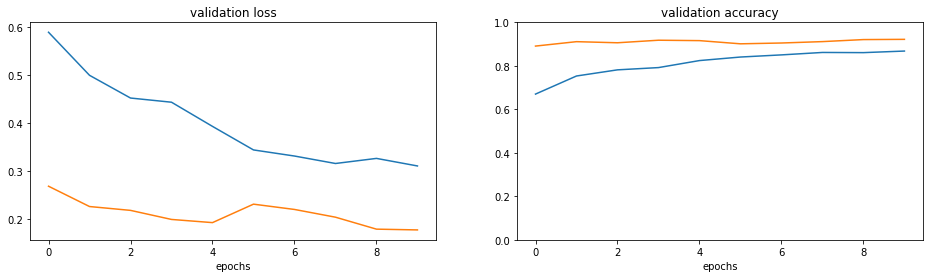

In [21]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [22]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.17027084529399872
Test accuracy: 0.9290666580200195


In [72]:
img, x = get_image(r'PetImages\PetImages\Cat\3.jpg')
probabilities = model_new.predict([x])

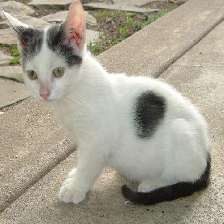

In [76]:
img

In [77]:
print(f'Gato: {probabilities[0][0] * 100:.2f}%') if probabilities[0][0] > probabilities[0][1] else print(f'Cachorro: {probabilities[0][1] * 100:.2f}%')

Gato: 89.84%
